# ABOUT THE DATA

This data set is a part of the Heart Disease Data Set (the part obtained from the V.A. Medical Center, Long Beach and Cleveland Clinic Foundation), using a subset of 14 attributes. The task is to detect the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

The attributes are explained below:

1 - age: The person's age in years

2 - sex: The person's sex (1 = male, 0 = female)
 
3 - cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4 - trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5 - chol: The person's cholesterol measurement in mg/dl

6 - fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) 

7 - restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8 - thalach: The person's maximum heart rate achieved

9- exang: Exercise induced angina (1 = yes; 0 = no)

10 - oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)

11 - slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12 - ca: The number of major vessels (0-3)

13 - thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14 - target (Disease yes = 1, Disease no = 0)

# Loading the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading data set
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Here we can see that our whole data is numeric in nature. Every feature is numeric

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


From the above table we can see that:
1 - minimum age is 29 , maximum is 77 and the mean age is 54.366337


2 - trestbps - this refers to Diastolic blood pressure that  indicates how much pressure your blood is exerting against your artery walls while the heart is resting between beats. The normal range is LESS THAN 80, Elvated Range is LESS THAN 80, 
HIGH BLOOD PRESSURE Stage 1 is 80 – 89, Stage 2 is 90 OR HIGHER, and HYPERTENSIVE CRISIS is HIGHER THAN 120. We can see that there is Maximum of 200, so it is cleared that many of the patient having HYPERTENSIVE CRISIS.


3- Total cholesterol levels less than 200 milligrams per deciliter (mg/dL) are considered desirable for adults. A reading between 200 and 239 mg/dL is considered borderline high and a reading of 240 mg/dL and above is considered high.
from the above data we can see that there is a huge diff between 75% and maximum values , it can be possible that there are some Outliers.


4 - A fasting blood sugar level less than 100 mg/dL (5.6 mmol/L) is normal. A fasting blood sugar level from 100 to 125 mg/dL (5.6 to 6.9 mmol/L) is considered prediabetes. If it's 126 mg/dL (7 mmol/L) or higher on two separate tests, you have diabetes.



# MISSING VALUE ANALYSIS

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Great, we do not have any missing value present on our data, we will processd with the Univariate analysis.

# UNIVARIATE ANALYSIS

In [6]:
sns.set_context("paper", font_scale = 1, rc = {"font.size": 10,"axes.titlesize": 15,"axes.labelsize": 10}) 

Text(0.5, 0, 'Sex(female = 0, Male = 1)')

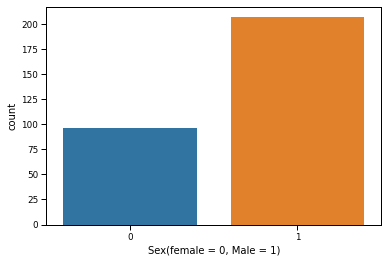

In [7]:
#lets check the count of Male and Female
sns.countplot(x='sex',data=data)
plt.xlabel('Sex(female = 0, Male = 1)')

Number of male are higher than of female in th given data set

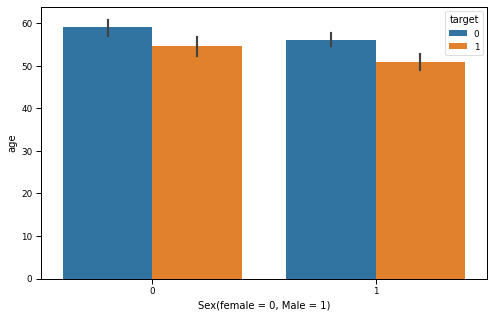

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(y = 'age', x = 'sex', hue = 'target',data=data)
plt.xlabel('Sex(female = 0, Male = 1)')
plt.show()

here we can see that the age of females who are suffering from heart disease are older than males

Text(0.5, 1.0, 'Distribution of Male and Female')

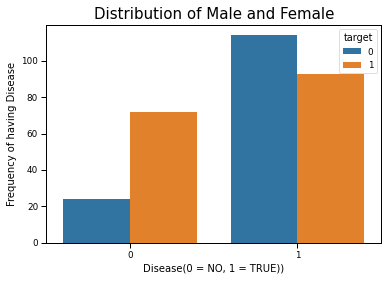

In [9]:
plt.figure()
sns.countplot(hue='target',x='sex',data=data)
plt.xlabel("Disease(0 = NO, 1 = TRUE))")
plt.ylabel('Frequency of having Disease')
plt.title("Distribution of Male and Female")

from the above graphs we can see that there are more male in the sample than the female, and male category is having the most number of heart Disease as compared to female

Text(0.5, 1.0, 'Distribution of Male and Female')

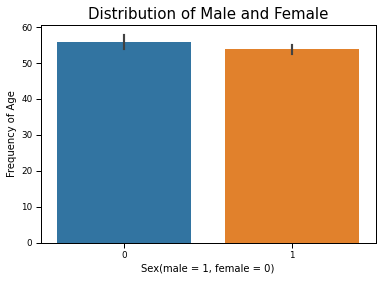

In [10]:
#checking the age of both male and female
plt.figure()
sns.barplot(y='age',x='sex',data=data)
plt.xlabel("Sex(male = 1, female = 0)")
plt.ylabel('Frequency of Age')
plt.title("Distribution of Male and Female")

Average Age of Female are higher than of Male

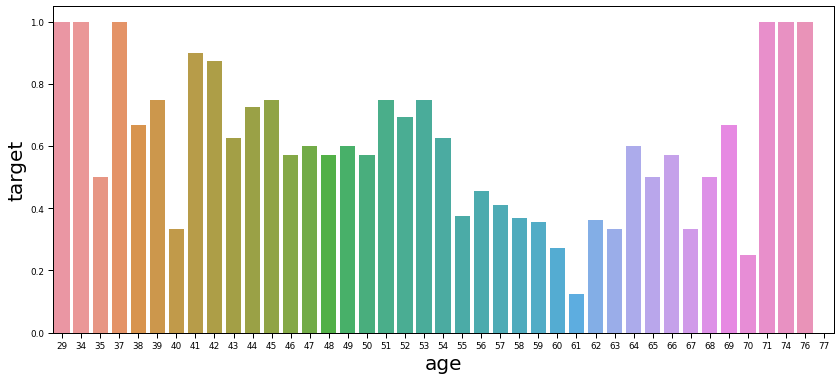

In [21]:
#checking the target frequency, grouped by age of the patient.
sns.set_context("paper", font_scale = 1, rc = {"font.size": 10,"axes.titlesize": 25,"axes.labelsize": 20}) 

plt.figure(figsize=(14,6))
sns.barplot(x='age',y='target',data=data.groupby('age').mean().reset_index())
plt.show()

from the above table we can see that patients not only at old age but also at early age can have Heart disease, as we can see that there is high frequency of having disease to the patient aged 29,34,37,41,42,71,74,76.
This could be because of their lifestyle, eating habbits and other related causes.

<Figure size 864x504 with 0 Axes>

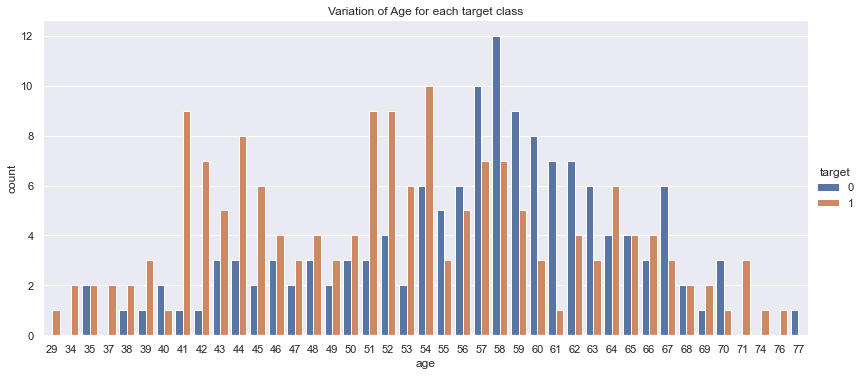

In [29]:
#distribution of target and age
plt.figure(figsize=(12,7))
sns.catplot(kind = 'count', data = data, x = 'age', hue = 'target', order = data['age'].sort_values().unique(),aspect=18/8)
plt.title('Variation of Age for each target class')
plt.show()

We see that most people who are suffering are of the age of 58, followed by 57.
Majorly, people belonging to the age group 50+ are suffering from the disease.

Text(0, 0.5, 'Frequency')

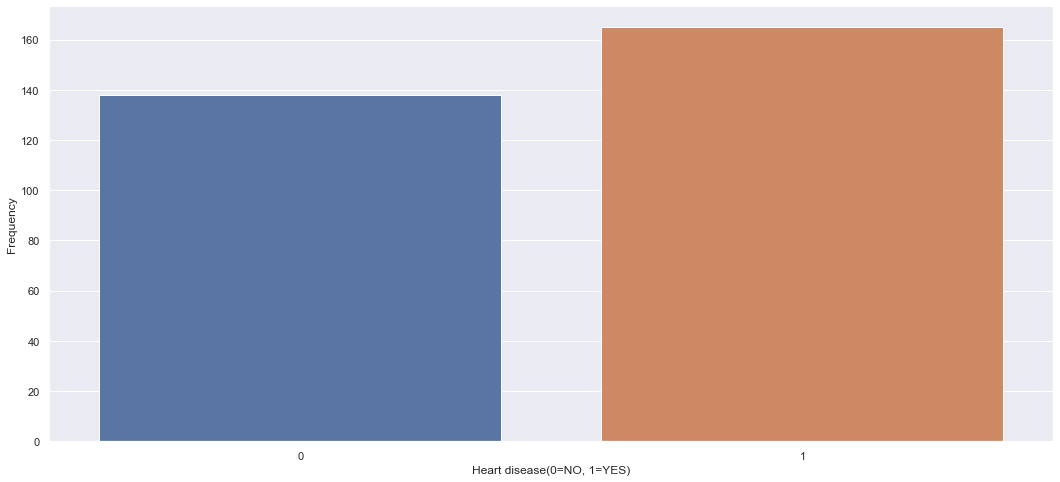

In [30]:
#checking the frequency of Target 
sns.countplot(x='target',data=data)
plt.xlabel('Heart disease(0=NO, 1=YES)')
plt.ylabel('Frequency')

From above graph, we can see that the number of patient having heart disease is more

# Bivariate Analysis

<AxesSubplot:xlabel='cp', ylabel='age'>

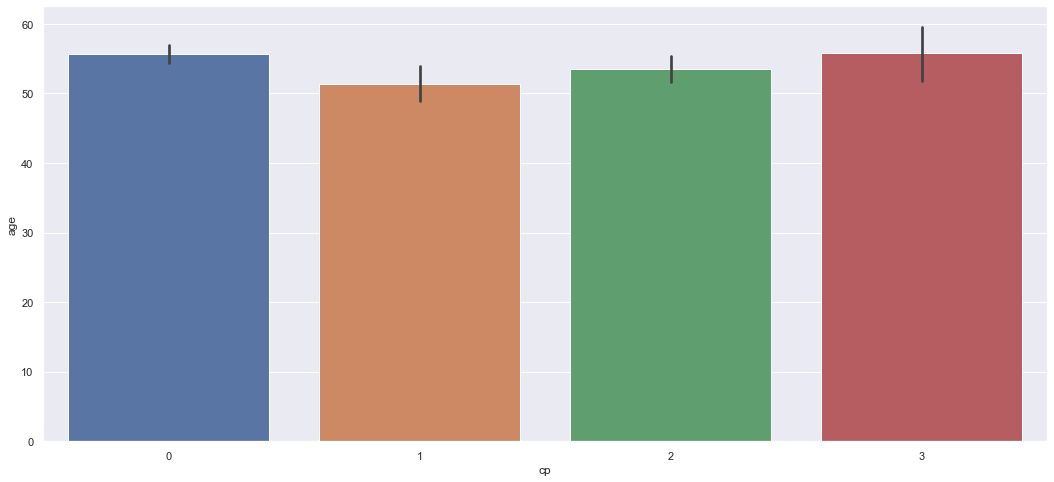

In [31]:
#we will 1st check the relation between age and chest pain.

sns.barplot(x='cp',y='age',data=data)

From the above graph we can see that any type of chest pain occurs to the patient aged between 50-60 and the chest pain level increase as the age increases

<AxesSubplot:xlabel='cp', ylabel='age'>

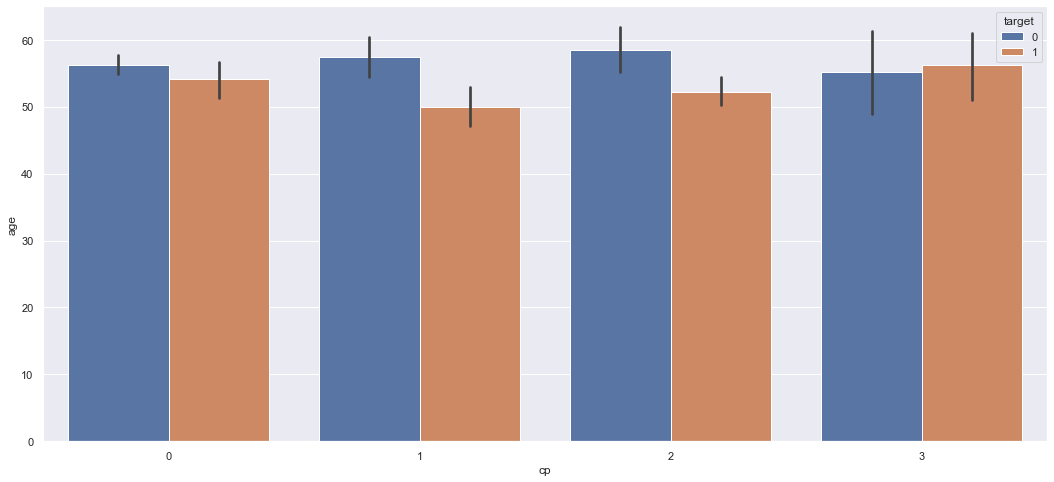

In [32]:
sns.barplot(x='cp',y='age',hue='target',data=data)

<AxesSubplot:xlabel='cp', ylabel='count'>

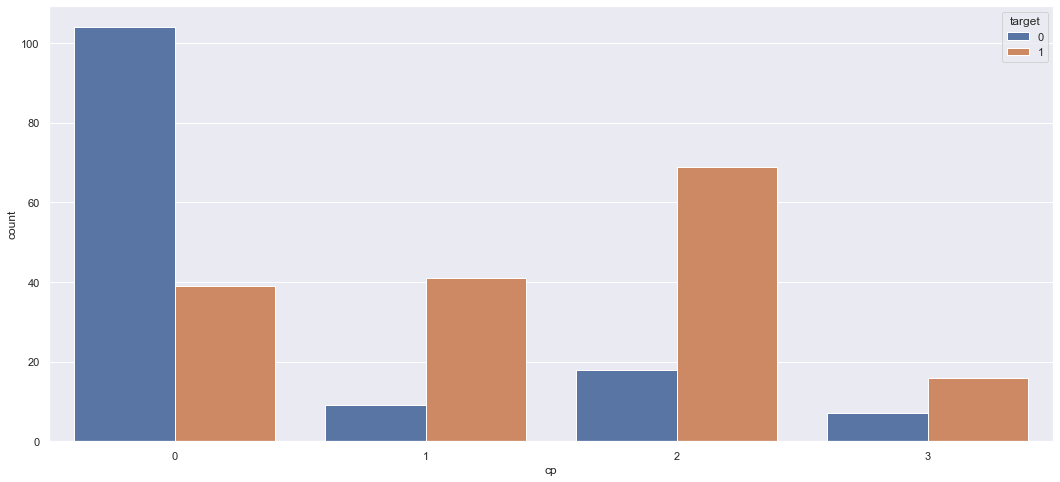

In [33]:
sns.countplot(x='cp',hue='target',data=data)

when the chest pain is 2 it can be seen that the number of patient having disease are more, so it could be possible that if the chest pain level is high there are more chances that the patient might have the disease.
chest pain can be considered as an important input for our model building


<AxesSubplot:xlabel='age', ylabel='trestbps'>

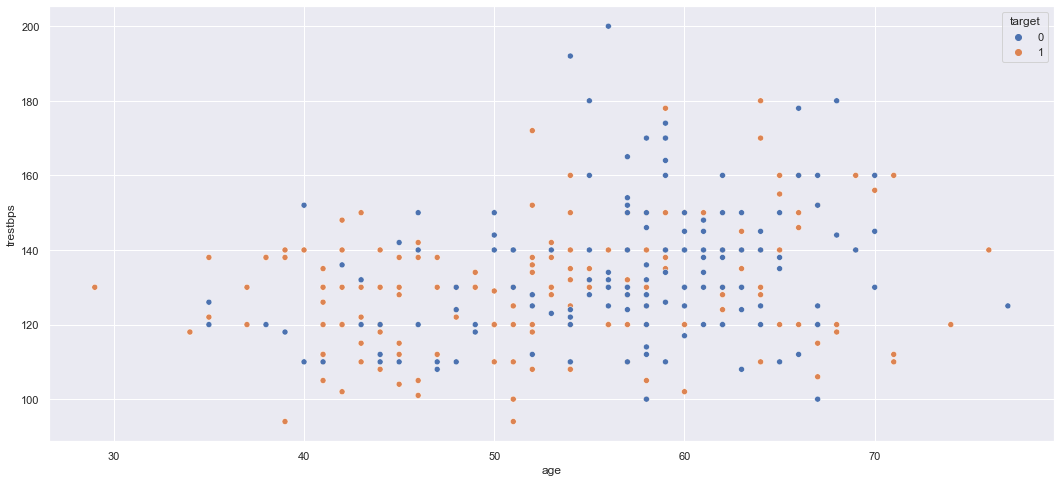

In [34]:
#checking the relation of resting heart rate

sns.scatterplot(x='age',y='trestbps',hue='target',data=data)

the pattern here tells that as the age is increasing the resting heart rate is also increasing.
from 40 to 65 age the resting heart rate frequency icreases for patient suffering from Disease

<AxesSubplot:xlabel='target', ylabel='trestbps'>

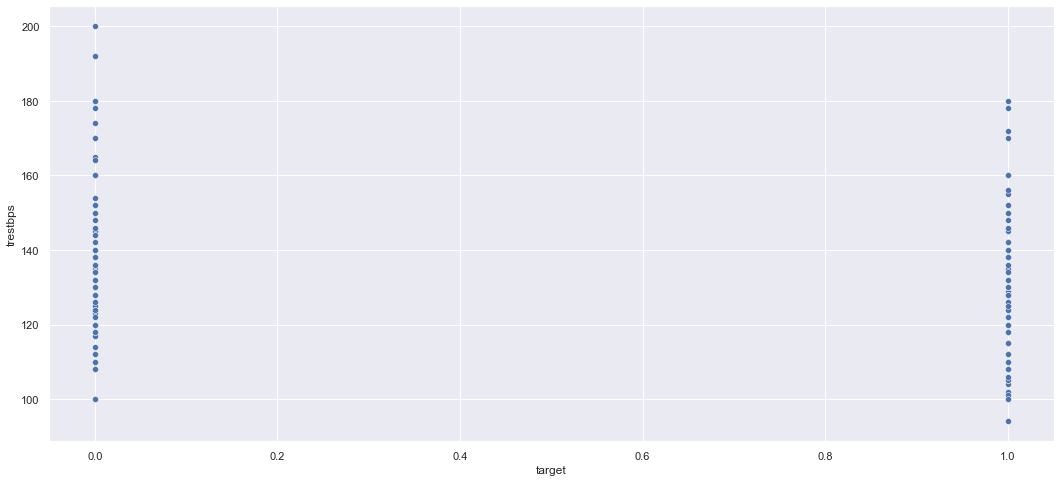

In [35]:
sns.scatterplot(x='target',y='trestbps',data=data)

and this graphs tells us that patient with resting heart rate 110 to 160 are more likely to have disease

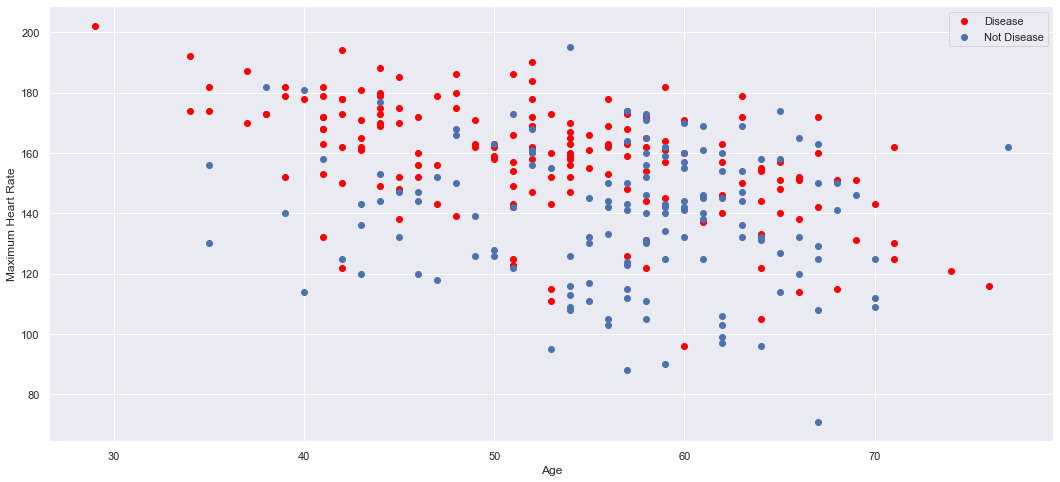

In [36]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

Above graphs shows that
1- Patient from age 39 to 57 are more likely to have Disease as it can be seen the maximum heart rate is the reason. The Maximum heart rate lies between 140-190, heart rate can be calculated according to the age of the person.
to measure maximum heart rate subtract the age of the person from 220.
Max heart rate in itself is not an indicator of fitness. 

Text(0.5, 0, 'The Slope of The Peak Exercise ST Segment ')

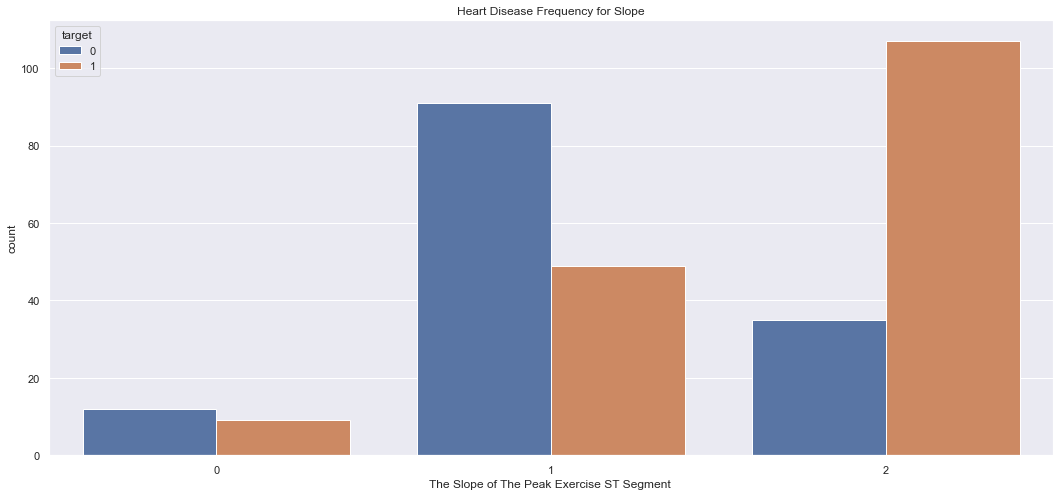

In [37]:
#checking the relation between target and slope

sns.countplot(x='slope',hue='target',data=data)
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')

Higher the number of the solpe of the peak exercise ST segment higher the count of patient having disease.

<AxesSubplot:xlabel='chol', ylabel='age'>

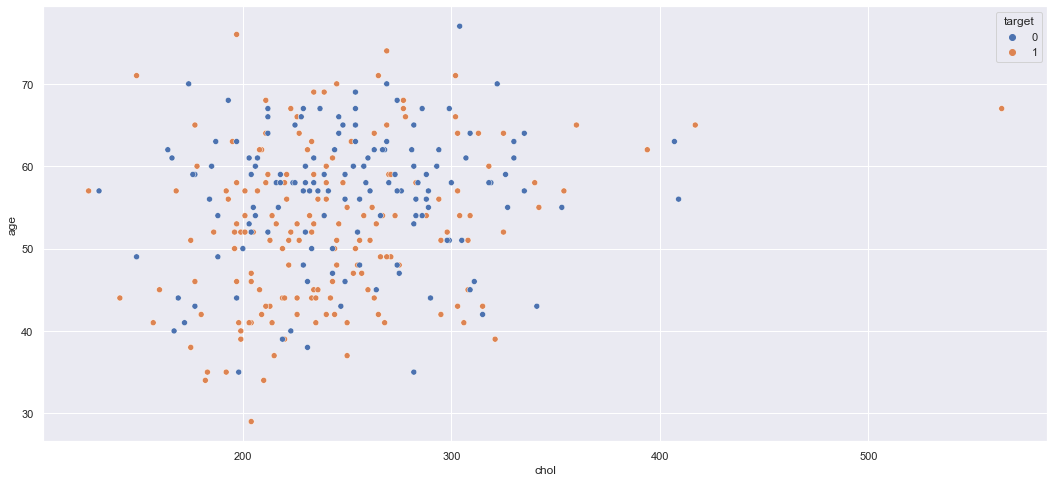

In [38]:
#checking the relation between age and cholestrol level for both Disease and non disease patient
sns.scatterplot(y='age',x='chol',hue='target',data=data)

patient having Cholestrol level 190-320 and aged between 40-60 are more likely to have heart Disease.
A reading between 200 and 239 mg/dL is considered borderline high and a reading of 240 mg/dL and above is considered high.

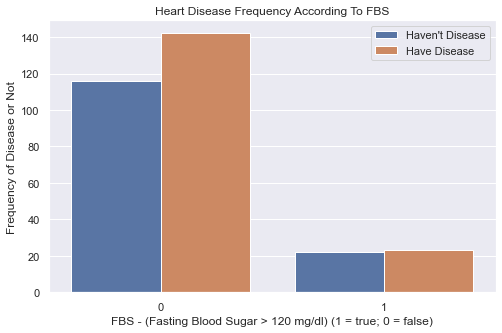

In [39]:
#
plt.figure(figsize=(8,5))
sns.countplot(x='fbs',hue='target',data=data)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.show()


The above graphs shows that number of patient having FBS less than 120 mg/dl are more. 
A fasting blood sugar level of more than 120 mg/dl is the current threshold for identifying patients with diabetes.

In this graph we can confirm that patient with no Diabetes are more than of having Diabetes

# Outliers Analysis

In [40]:
from scipy.stats import zscore

In [41]:
z = np.abs(zscore(data))
print(z)

[[0.9521966  0.68100522 1.97312292 ... 0.71442887 2.14887271 0.91452919]
 [1.91531289 0.68100522 1.00257707 ... 0.71442887 0.51292188 0.91452919]
 [1.47415758 1.46841752 0.03203122 ... 0.71442887 0.51292188 0.91452919]
 ...
 [1.50364073 0.68100522 0.93851463 ... 1.24459328 1.12302895 1.09345881]
 [0.29046364 0.68100522 0.93851463 ... 0.26508221 1.12302895 1.09345881]
 [0.29046364 1.46841752 0.03203122 ... 0.26508221 0.51292188 1.09345881]]


In [42]:
#now setting the threshold limit to 3, the reason being 99% of the data is in 3 standard deviation.

threshold = 3
print(np.where(z>3))

(array([ 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
       251, 272, 281], dtype=int64), array([ 4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12],
      dtype=int64))


In [43]:
data_zout = data[(z<3).all(axis = 1)]
data_zout.shape

(287, 14)

In [44]:
print("Shape of our old data :", data.shape)
print("Shape of our cleaned data :", data_zout.shape)

Shape of our old data : (303, 14)
Shape of our cleaned data : (287, 14)


# CORRELATION METRIX

<AxesSubplot:>

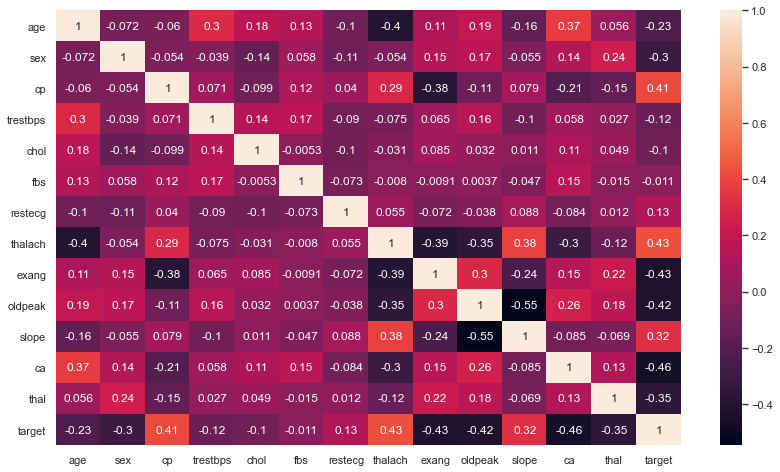

In [45]:
data_cor = data_zout.corr()
plt.figure(figsize=(14,8),)
sns.heatmap(data_cor,annot=True)

the ('chol','fbs','restecg'), are less correlated to Target variable, we can drop these columns, however I will be trying to evaluate using all the factors.

# CHECKING AND FIXING SKEWNESS

In [46]:
data_zout.skew()

age        -0.184321
sex        -0.825426
cp          0.491220
trestbps    0.530712
chol        0.245591
fbs         2.051982
restecg     0.155787
thalach    -0.473864
exang       0.738876
oldpeak     0.984256
slope      -0.503916
ca          1.211037
thal       -0.190864
target     -0.204199
dtype: float64

In [47]:
for col in data_zout.columns:
    if data_zout[col].skew()>0.55:
        data_zout[col]=np.log1p(data_zout[col])

In [48]:
data_zout.skew()

age        -0.184321
sex        -0.825426
cp          0.491220
trestbps    0.530712
chol        0.245591
fbs         2.051982
restecg     0.155787
thalach    -0.473864
exang       0.738876
oldpeak     0.331394
slope      -0.503916
ca          0.765030
thal       -0.190864
target     -0.204199
dtype: float64

# Splitting Data into input and output

In [49]:
x = data_zout.drop('target',axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,0.693147,0,150,0.000000,1.193922,0,0.0,1
1,37,1,2,130,250,0.000000,1,187,0.000000,1.504077,0,0.0,2
2,41,0,1,130,204,0.000000,0,172,0.000000,0.875469,2,0.0,2
3,56,1,1,120,236,0.000000,1,178,0.000000,0.587787,2,0.0,2
4,57,0,0,120,354,0.000000,1,163,0.693147,0.470004,2,0.0,2


In [50]:
y = data_zout['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# STANDARD SCALING

I will be doing standard scaling on the input features as some of the features like age, trestbps , chol, thalach, these columns have different scales.


In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
sc = StandardScaler()

In [53]:
x = sc.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.954638,0.670444,1.958231,0.823925,-0.250907,2.449490,-1.013312,0.008668,-0.697887,1.238435,-2.327663,-0.776942,-2.250516
1,-1.909660,0.670444,0.992574,-0.060392,0.119943,-0.408248,0.887476,1.652290,-0.697887,1.845915,-2.327663,-0.776942,-0.537258
2,-1.468998,-1.491549,0.026917,-0.060392,-0.883533,-0.408248,-1.013312,0.985957,-0.697887,0.614701,0.971296,-0.776942,-0.537258
3,0.183481,0.670444,0.026917,-0.649938,-0.185463,-0.408248,0.887476,1.252490,-0.697887,0.051237,0.971296,-0.776942,-0.537258
4,0.293646,-1.491549,-0.938740,-0.649938,2.388672,-0.408248,0.887476,0.586157,1.432896,-0.179457,0.971296,-0.776942,-0.537258


# Importing Models and other Libraries

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [55]:
#checking cross validation
models = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),
         GaussianNB()]

for model in models:
    print("model name =",model)
    model.scores = cross_val_score(model, x, y, cv=5)
    print('Model scores :',model.scores)
    print('Model mean score: ',model.scores.mean())
    print('Model std score :', model.scores.std())
    print('\n')
    

model name = LogisticRegression()
Model scores : [0.86206897 0.86206897 0.78947368 0.87719298 0.80701754]
Model mean score:  0.8395644283121596
Model std score : 0.0346329288649305


model name = SVC()
Model scores : [0.84482759 0.87931034 0.8245614  0.85964912 0.78947368]
Model mean score:  0.8395644283121596
Model std score : 0.030805866524200688


model name = DecisionTreeClassifier()
Model scores : [0.75862069 0.75862069 0.73684211 0.66666667 0.73684211]
Model mean score:  0.7315184513006654
Model std score : 0.033857050080857015


model name = KNeighborsClassifier()
Model scores : [0.79310345 0.84482759 0.8245614  0.84210526 0.77192982]
Model mean score:  0.8153055051421658
Model std score : 0.02845991198020826


model name = RandomForestClassifier()
Model scores : [0.81034483 0.87931034 0.8245614  0.80701754 0.80701754]
Model mean score:  0.8256503327283726
Model std score : 0.027601459363746566


model name = GaussianNB()
Model scores : [0.81034483 0.87931034 0.78947368 0.894736

From above cross validation , Logistic Regression and SVC are performing approx same and better from others, I will use Logistic Regression for my main model

In [56]:
#checking best Random state.
max_lr_score = 0
for r_state in range(41,100):
    X_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.33,random_state=r_state)
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    lr_pred = lr.predict(x_test)
    Accuracy = accuracy_score(y_test,lr_pred)
    if Accuracy>max_lr_score:
        max_lr_score=Accuracy
        final_r_state = r_state
        
print('max r2_score for the given ','', final_r_state, 'is', max_lr_score)

max r2_score for the given   81 is 0.9157894736842105


Super!!!!, Getting accuracy of 91% is good.
lets check for grid search for parameter tuning of the model

In [57]:
#giving the parameter grid for gridsearchCV for Logistic Regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [58]:
grid_search = GridSearchCV(estimator = lr, param_grid = param_grid)

In [59]:
grid_search.fit(x, y)
grid_search.best_params_

{'C': 0.1}

In [60]:
#creating final model

X_train_new,x_test_new,y_train_new,y_test_new= train_test_split(x,y,test_size=.33,random_state=81)

lr_new = LogisticRegression(C=0.1)


In [61]:
lr_model = lr_new.fit(X_train_new,y_train_new)
lr_pred_new = lr_new.predict(x_test_new)

Accuracy = accuracy_score(y_test_new,lr_pred_new)
con_mat = confusion_matrix(y_test_new,lr_pred_new)
clas_rprt = classification_report(y_test_new,lr_pred_new)

In [62]:
print('Accuracy score of our model is :', Accuracy)

Accuracy score of our model is : 0.9052631578947369


In [63]:
print('Confusion metrix of our model is :')

con_mat

Confusion metrix of our model is :


array([[37,  7],
       [ 2, 49]], dtype=int64)

In [64]:
print('Classification report of our model is:',clas_rprt)



Classification report of our model is:               precision    recall  f1-score   support

           0       0.95      0.84      0.89        44
           1       0.88      0.96      0.92        51

    accuracy                           0.91        95
   macro avg       0.91      0.90      0.90        95
weighted avg       0.91      0.91      0.90        95



# AUC_ROC CURVE

In [65]:
from sklearn.metrics import auc,roc_auc_score,roc_curve

In [66]:
lr_pred_prob = lr_new.predict_proba(x_test_new)

In [67]:
lr_pred_prob

array([[0.71483091, 0.28516909],
       [0.54784132, 0.45215868],
       [0.0797679 , 0.9202321 ],
       [0.14550731, 0.85449269],
       [0.05060364, 0.94939636],
       [0.14747737, 0.85252263],
       [0.10365111, 0.89634889],
       [0.9534731 , 0.0465269 ],
       [0.93947562, 0.06052438],
       [0.10380874, 0.89619126],
       [0.78922994, 0.21077006],
       [0.34662308, 0.65337692],
       [0.48740191, 0.51259809],
       [0.59627092, 0.40372908],
       [0.93903427, 0.06096573],
       [0.72846911, 0.27153089],
       [0.86994313, 0.13005687],
       [0.38703916, 0.61296084],
       [0.88800259, 0.11199741],
       [0.27368204, 0.72631796],
       [0.83944637, 0.16055363],
       [0.96837362, 0.03162638],
       [0.31653664, 0.68346336],
       [0.17434006, 0.82565994],
       [0.28290659, 0.71709341],
       [0.83544144, 0.16455856],
       [0.07624361, 0.92375639],
       [0.8525349 , 0.1474651 ],
       [0.91773981, 0.08226019],
       [0.1999187 , 0.8000813 ],
       [0.

In [68]:
#predicting the probability of having one
lr_pred_prob = lr_new.predict_proba(x_test_new)[:,1]
lr_pred_prob

array([0.28516909, 0.45215868, 0.9202321 , 0.85449269, 0.94939636,
       0.85252263, 0.89634889, 0.0465269 , 0.06052438, 0.89619126,
       0.21077006, 0.65337692, 0.51259809, 0.40372908, 0.06096573,
       0.27153089, 0.13005687, 0.61296084, 0.11199741, 0.72631796,
       0.16055363, 0.03162638, 0.68346336, 0.82565994, 0.71709341,
       0.16455856, 0.92375639, 0.1474651 , 0.08226019, 0.8000813 ,
       0.95694477, 0.30434129, 0.64050507, 0.775194  , 0.03035657,
       0.03925076, 0.16546769, 0.14849493, 0.49217024, 0.58800765,
       0.65857206, 0.96159618, 0.02472022, 0.84912738, 0.5304425 ,
       0.93207317, 0.8580116 , 0.51064801, 0.04029752, 0.09924958,
       0.02745834, 0.14612145, 0.9209332 , 0.12422154, 0.77843521,
       0.01245129, 0.62516839, 0.20366642, 0.53716497, 0.27871689,
       0.81475742, 0.66644612, 0.67184392, 0.04510109, 0.84652018,
       0.14709733, 0.73543344, 0.75743598, 0.92012183, 0.06407796,
       0.84967008, 0.04422084, 0.16521356, 0.72185313, 0.82563

In [69]:
#fpr = false positive rate
#tpr = true positive rate
#thresholds we set

fpr,tpr,thresholds = roc_curve(y_test_new,lr_pred_prob)

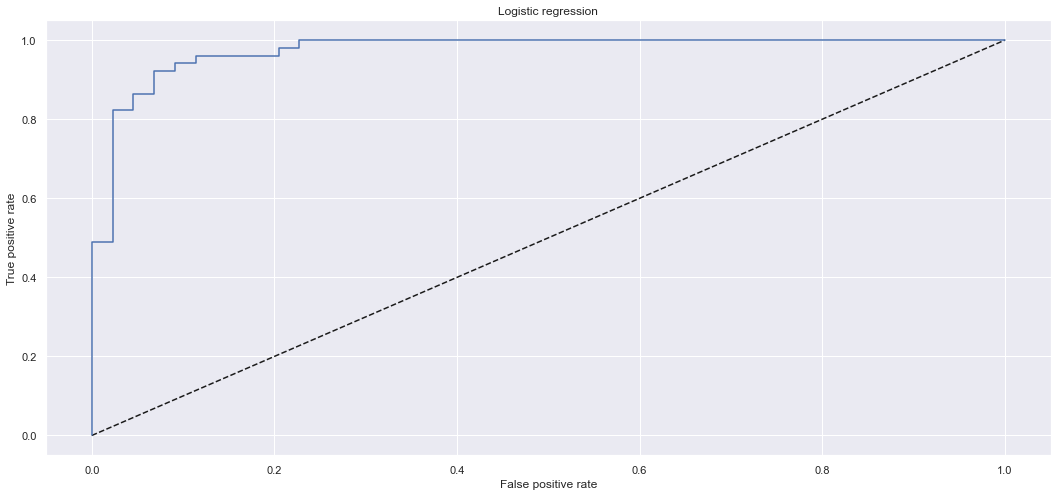

In [70]:
#plotting AUC ROC curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic regression')
plt.show()

In [71]:
#saving redicted file into csv format
lr_pred_new

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [72]:
result = pd.DataFrame(lr_pred_new)
result.head()

,0
0,0
1,0
2,1
3,1
4,1


In [73]:
result.index = x_test.index # its important for comparison
result.columns = ["prediction"]
result.to_csv("prediction_results.csv")

In [75]:

#saving the model
import joblib
joblib.dump(lr_pred_new,'Heartdisease.pkl')

['Heartdisease.pkl']